In [0]:
pip install -U nltk

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Out[2]: True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("https://raw.githubusercontent.com/Krishna-97/Data_Sets/main/tripadvisor_hotel_reviews.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


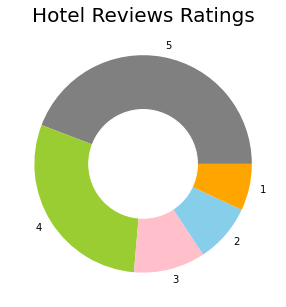

In [0]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["grey", "yellowgreen", "pink", "skyblue", "orange"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [0]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

                                              Review  Rating  Positive  \
0  nice hotel expensive parking got good deal sta...       4     0.285   
1  ok nothing special charge diamond member hilto...       2     0.189   
2  nice rooms not 4* experience hotel monaco seat...       3     0.219   
3  unique, great stay, wonderful time hotel monac...       5     0.385   
4  great stay great stay, went seahawk game aweso...       5     0.221   

   Negative  Neutral  
0     0.072    0.643  
1     0.110    0.701  
2     0.081    0.700  
3     0.060    0.555  
4     0.135    0.643  


In [0]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [0]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6359.91000000002
Negative:  1473.4750000000038
Neutral:  12657.627999999937


In [0]:
pip install -U wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


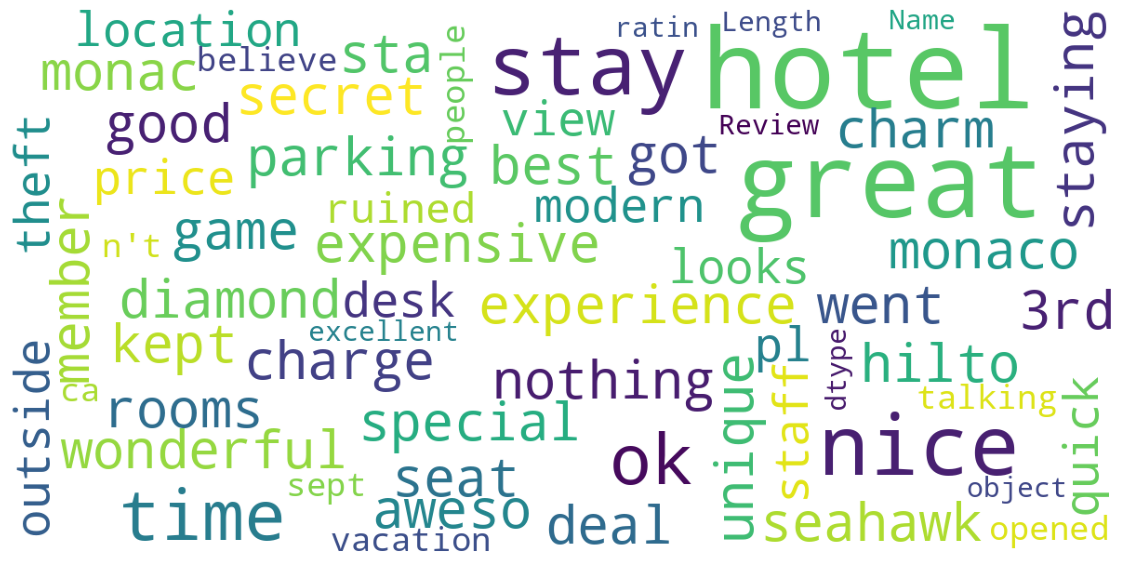

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["Review"])